<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Nov3-4/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

$\hat{y}$ predicción es la probabilidad de que sea perro o gato dado el vector x, la información. $0 ≤ ̂y ≤ 1$ porque es una probabilidad. Viene dada por $ y = a = σ (w^T x + b) $. Entonces $z = (w^T x + b)$, $a = σ(z) = \frac{1}{1+ e^{-z}}$.


La función costo cambia. Deja de ser la diferencia al cuadrado. Ahora es:
$$
J(w, b) = \frac{1}{m} Σ_{i=1}^{m} L(̂y^{(i)}, y^{(i)}) =a \frac{1}{m} Σ[(y^{(i)})log(\hat{y}^{(i)})+(1-y^{(i)})log(1-̂\hat{y}^{(i)})]
$$
Función costo depende de los costos. Los costos tienen diferentes usos. Antes había una interpretación física

Ejercicio: Demostrar que $dw = \frac{1}{m} x dz$ y $db = \frac{1}{m}dz$ creo que también $dz = a - y$. Los db son las derivadas de la función costo respecto a las variables. $\frac{dJ}{dw} = dw, \frac{dJ}{db} = db$


La función costo no puede ser una escalón porque es necesario la derivada de ella.


In [1]:

import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pdb
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos los datos que vamos a trabajar.

In [3]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
#files=glob.glob('/content/drive/MyDrive/DCI_data/ML2023/CAT_DOG/train/*')
files=glob.glob("/content/drive/MyDrive/ML2023/CATS_DOGS/*")

In [4]:
len(files)

1787

In [5]:
#numero de pixeles para nuestras imágenes.
num_px=64

Veamos algunas de las imagenes

Preparamos el dataset de entrenamiento.



In [6]:
train_x=[]
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

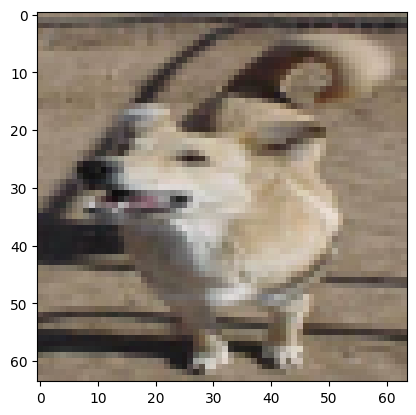

In [7]:
plt.imshow(train_x[0])


Preparamos el dataset de prueba

In [8]:
test_x=[]
test_y=[]
#for file in files[4300:]:
for file in files:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

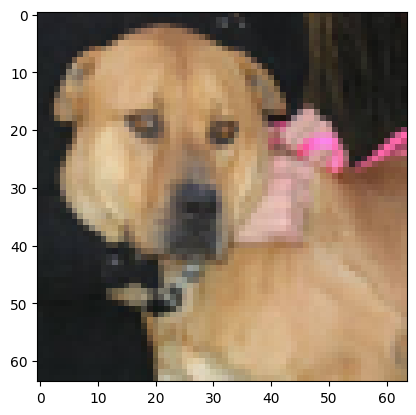

In [9]:
plt.imshow(test_x[1])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [10]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes

In [11]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

--------------------

In [14]:
def que_es(x):
  print("tipo: ", type(x))
  print("shape: ", np.shape(x))
  print("\n")

que_es(train_set_x)
que_es(train_set_y)

tipo:  <class 'numpy.ndarray'>
shape:  (12288, 100)


tipo:  <class 'numpy.ndarray'>
shape:  (1, 100)




Cada elemento del array es un arreglo de todos los valores de los pixeles de la imagen, es decir (alto x ancho x 3). Son 100 elementos porque utilizamos 100 imágenes.

Ya esta listo nuestro set de datos para poder trabajar con el.

___________________________

1.   Pesos iniciales
2.   Calcular Z con los pesos
3.   Aplicar la sigmoide a z, lo que me da y
4.   Con y obtener el costo y sus derivadas
5.   Actualizar los costos


$$
z = W^T x + b
$$


In [54]:
x = train_set_x
y = train_set_y
w = np.zeros((np.shape(train_set_x)[0]))
wt = w.T

m = train_set_y.shape[1]
b = 0

In [39]:
que_es(wt)

tipo:  <class 'numpy.ndarray'>
shape:  (12288,)




In [83]:
def Z(w, x, b):
  z = (w.T @ x) + b
  return z

$$
σ(z) = \frac{1}{1+ e^{-z}}
$$

In [43]:
def sigmoide(z):
  a = 1 / (1 + np.exp(-z))
  return a

$$
y = σ(z)
$$

In [48]:
y_hat = sigmoide(z)
y_hat.shape

(100,)

$$
J(w, b) = -\frac{1}{m} Σ_{i=1}^{m} L(̂y^{(i)}, y^{(i)}) =- \frac{1}{m} Σ_{i=1}^{m}[(y^{(i)})log(\hat{y}^{(i)})+(1-y^{(i)})log(1-̂\hat{y}^{(i)})]
$$

In [52]:
def costo(y, y_hat, w, b):
  j = - (1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat))
  return j
cost = costo(train_set_y, y_hat, w, b)
cost

0.6931471805599453


$$
dw = \frac{1}{m}x dz
$$
$$
db = \frac{1}{m}dz
$$
$$
dz = a - y, \hat{y} = a
$$

In [76]:
dz = y_hat - y[0,:]
dw = 1/m * x @ dz
db = 1/m * dz

In [97]:
db

array([-0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,  0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005,  0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,  0.005,
        0.005,  0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,  0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005,  0.005, -0.005, -0.005, -0.005,  0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005, -0.005,  0.005, -0.005,  0.005, -0.005,  0.005,
        0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005, -0.005,
       -0.005, -0.005,  0.005, -0.005,  0.005, -0.005, -0.005, -0.005,
        0.005, -0.005, -0.005, -0.005])

$$
w = w - \alpha \frac{\partial J}{\partial w} = w - \alpha dw
$$


$$
b = b - \alpha \frac{\partial J}{\partial b} = b - \alpha db
$$

$\alpha$ = learning rate

In [78]:
alpha = 0.5
w = w - alpha * dw
b = b - alpha * db

Algoritmo de la regresión logistica  (o red neuronal sencilla)

In [126]:
def desc_grad(x, y, w, b, alpha, iteraciones):
  m = y.shape[1]
  y = y[0,:]
  costos = []
  for i in range(iteraciones):
    z = Z(w.T, x, b)
    y_hat = sigmoide(z)
    cost = costo(train_set_y, y_hat, w, b)
    costos.append(cost)
    dz = y_hat - y

    dw = 1/m * x @ dz
    db = 1/m * dz

    w = w - alpha * dw
    b = b - alpha * db
    b = b.mean()
  salida = {"w":w, "b":b, "costos":costos}
  return salida


In [127]:
x = train_set_x
y = train_set_y
w = np.zeros((np.shape(train_set_x)[0]))
b = 0

salida = desc_grad(x, y, w, b, alpha=0.005, iteraciones=1000)

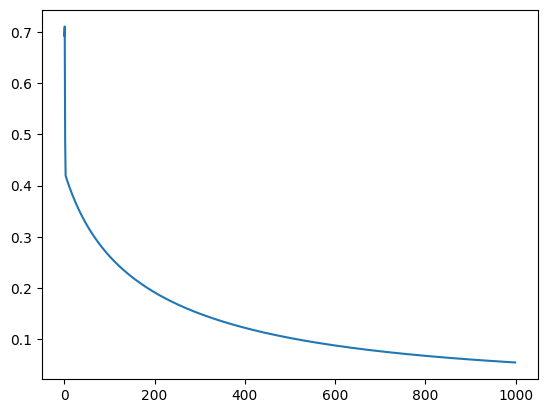

In [117]:
plt.plot(salida["costos"])

In [133]:
test_set_x.shape

(12288, 1787)

In [118]:
# validacion conjunto de validacion

In [151]:
def perceptron(x_train, y_train, x_test, y_test, w, b, learning_rate, iteraciones):
  w = np.zeros((np.shape(train_set_x)[0]))
  b = 0

  salida = desc_grad(x_train, y_train, w, b, alpha=0.005, iteraciones=1000)

  w = np.array(salida["w"])
  b = salida["b"]

  z = Z(w, x_train, b)
  z = np.array(z)
  y_pre1 = sigmoide(z)
  y_pre1 = np.round(y_pre1)

  z = Z(w, x_test, b)
  z = np.array(z)
  y_pre2 = sigmoide(z)
  y_pre2 = np.round(y_pre2)

  print("Precisión del conjunto de entrenamiento: ", np.sum(y_train == y_pre1)/y_train.shape[1])
  print("Precisión del conjunto de prueba: ", np.sum(y_test == y_pre2)/y_test.shape[1])
  return salida

In [152]:
w = np.zeros((np.shape(train_set_x)[0]))
b = 0

_ = perceptron(train_set_x, train_set_y, test_set_x, test_set_y, w, b, learning_rate=0.005, iteraciones=1000)

Precisión del conjunto de entrenamiento:  1.0
Precisión del conjunto de prueba:  0.5249020705092333
